In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd# Only used for generating random numbers

##### Import and Read the data.

In [2]:
# Create function reading dataset.
def read_data(file_path:str)->list:
    data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        lines = lines[1:]
        for line in lines:
            values = line.strip().split()
            data.append([float(val) for val in values])
    return data

In [3]:
def fisher_yates_shuffle(arr):
    rd.shuffle(arr)

In [4]:
dataset = read_data('iris.pat')

fisher_yates_shuffle(dataset)

In [5]:
# Define function train_test_split to split the data and labels.
def train_test_split(dataset:list)->list:
    data = [d[:-1] for d in dataset]
    labels = [int(label[-1]) for label in dataset]
    return data, labels

In [6]:
X, y = train_test_split(dataset)
X = np.array(X)
y = np.array(y)

In [7]:
def hold_out(train, test, num_train = 70):
    length = len(train)
    d = length*num_train // 100
    X_train = train[:d]
    X_test = test[:d]

    y_train = train[d:]
    y_test = test[d:]

    return X_train, X_test, y_train, y_test

In [8]:
hold_out(X,y)

(array([[7.4, 2.8, 6.1, 1.9],
        [4.8, 3.4, 1.6, 0.2],
        [5.5, 2.5, 4. , 1.3],
        [6. , 2.7, 5.1, 1.6],
        [7.9, 3.8, 6.4, 2. ],
        [5.8, 2.7, 4.1, 1. ],
        [4.4, 3.2, 1.3, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [7.7, 2.8, 6.7, 2. ],
        [5.4, 3.4, 1.5, 0.4],
        [5.5, 4.2, 1.4, 0.2],
        [5.4, 3.4, 1.7, 0.2],
        [7.6, 3. , 6.6, 2.1],
        [5.1, 3.8, 1.5, 0.3],
        [6.7, 3.3, 5.7, 2.5],
        [6.4, 2.8, 5.6, 2.1],
        [4.7, 3.2, 1.6, 0.2],
        [6.4, 3.1, 5.5, 1.8],
        [6.8, 3. , 5.5, 2.1],
        [6.9, 3.1, 5.1, 2.3],
        [6.4, 3.2, 5.3, 2.3],
        [6.6, 3. , 4.4, 1.4],
        [6.1, 2.6, 5.6, 1.4],
        [6.2, 2.2, 4.5, 1.5],
        [5.2, 3.5, 1.5, 0.2],
        [6.5, 3. , 5.8, 2.2],
        [6.5, 3.2, 5.1, 2. ],
        [5.4, 3.9, 1.7, 0.4],
        [6.7, 2.5, 5.8, 1.8],
        [5.8, 2.6, 4. , 1.2],
        [6. , 2.9, 4.5, 1.5],
        [7. , 3.2, 4.7, 1.4],
        [5. , 3.5, 1.6, 0.6],
        [5

C:\Users\clapp\AppData\Local\Temp\ipykernel_11196\998433471.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


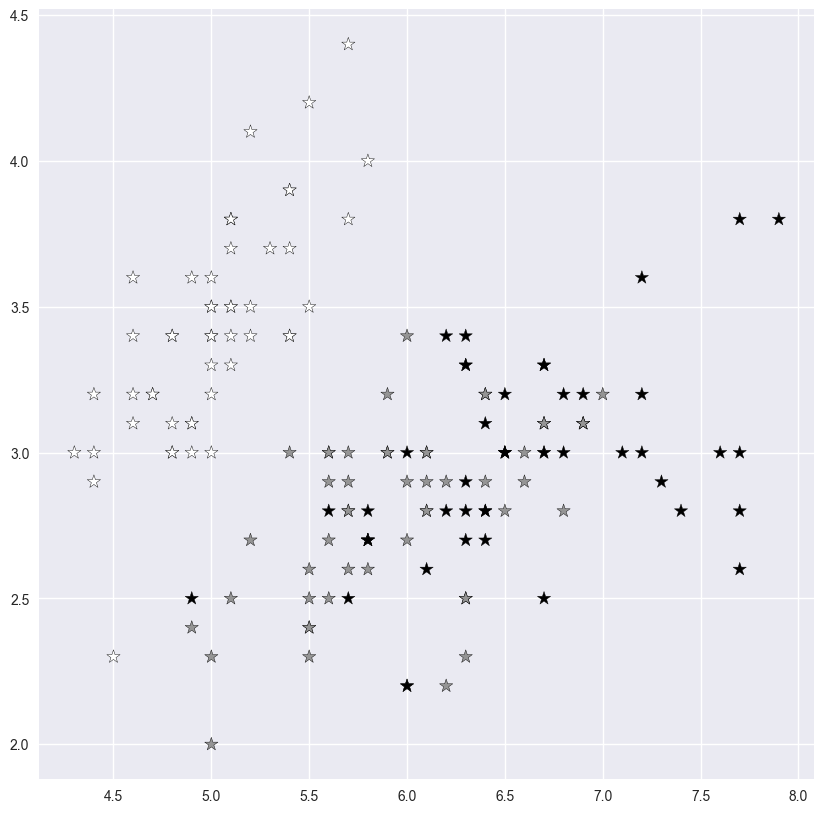

In [9]:
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*' ,s=100 ,edgecolors='black')
plt.show()

#### Distance

In [10]:
# Function calculate Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

#### Modeling

In [11]:
# สร้างฟังก์ชัน K-NN
def k_nearest_neighbors(X_train, y_train, x_query, k):

    distances = [euclidean_distance(x_query, x) for x in X_train]

    sorted_indices = np.argsort(distances)

    k_indices = sorted_indices[:k]

    k_nearest_labels = [y_train[i] for i in k_indices]

    most_common = np.bincount(k_nearest_labels).argmax()

    return most_common

#### Cross validation

In [12]:
# สร้างฟังก์ชันที่ทำ Cross Validation
def cross_validation(X, y, k_folds, k):
    fold_size = len(X) // k_folds
    accuracy_scores = []
    
    for i in range(k_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_val_fold = X[start:end]
        y_val_fold = y[start:end]
        X_train_fold = np.concatenate((X[:start], X[end:]), axis=0)
        y_train_fold = np.concatenate((y[:start], y[end:]), axis=0)

        correct_predictions = 0
        for j in range(len(X_val_fold)):
            predicted_label = k_nearest_neighbors(X_train_fold, y_train_fold, X_val_fold[j], k)
            if predicted_label == y_val_fold[j]:
                correct_predictions += 1

        accuracy = correct_predictions / len(X_val_fold)
        accuracy_scores.append(accuracy)

    avg_accuracy = np.mean(accuracy_scores)
    return avg_accuracy

#### Set Parameters

In [13]:
k_folds = 10

#### Main Program

In [14]:
k_dict = {}
X_train, X_test, Y_train, Y_test = hold_out(X,y)
for k in range(1,20,2):
    avg_accuracy = cross_validation(np.array(X_train), np.array(X_test), k_folds, k)
    k_dict[k] = avg_accuracy
    print(f"k = {k}, Average Accuracy: {avg_accuracy:.4f}")

max_k = max(k_dict.values())
foo = list(k_dict.values())
index = list(k_dict.keys())
max_k = index[foo.index(max_k)]

print(max_k)

k = 1, Average Accuracy: 0.9700
k = 3, Average Accuracy: 0.9600
k = 5, Average Accuracy: 0.9600
k = 7, Average Accuracy: 0.9600
k = 9, Average Accuracy: 0.9700
k = 11, Average Accuracy: 0.9600
k = 13, Average Accuracy: 0.9600
k = 15, Average Accuracy: 0.9400
k = 17, Average Accuracy: 0.9400
k = 19, Average Accuracy: 0.9400
1


## TESTING

In [15]:
cross_validation(np.array(Y_train), np.array(Y_test), k_folds, k=max_k)

0.95